# SPARK 2025 FOUNDATIONAL COURSE WEEK 6: <span style= "color:orange"> MEDICAL DATA MANIPULATION AND PROCESSING </span>

### **Objective:**

This tutorial session aims to provide participants with a foundational understanding of **medical image processing**, covering essential concepts such as **medical imaging formats**, **data handling**, and **pre-processing techniques**. Participants will learn to work with key medical image processing libraries, including **SimpleITK**, **pydicom**, **TorchIO**, and **MONAI**, and explore deep learning-based approaches for medical image analysis. The session will also cover data **augmentation techniques**, and visualization methods as well as setting up **custom data loaders** in PyTorch to equip learners with practical skills for medical imaging applications.


<img src='https://torchio.readthedocs.io/_images/fpg_progressive.gif'>

Image source: [https://torchio.readthedocs.io/transforms/transforms.html](https://torchio.readthedocs.io/transforms/transforms.html)

## Course Outline:

#### Introduction to Image processing

#### Loading and Saving Medical Data
- Medical Imaging Formats
    - <span style="color: orange">DICOM</span>
    - <span style="color: orange">NifTI</span>
    - Analyze (HDR/IMG)
    - MINC (Medical Imaging NetCDF)
    - MHD/RAW (MetaImage)
    - PNG/JPEG/TIFF for Medical Imaging
- Medical Image Processing Libraries
    - General Medical Image Processing Libraries
        - SimpleITK
        - pydicom
        - NiBabel
    - Computer Vision Libraries
        - OpenCV
        - scikit-image
        - <span style="color:red">TorchVision: Optimized for 2D</span>
    - Deep Learning-Based Medical Image Analysis Libraries
        - <span style="color: orange">MONAI</span> (Medical Open Network for AI)
        - <span style="color: orange">TorchIO</span>
- Visualization of Medical Images
    - matplotlib & seaborn
    - ITK-SNAP
#### Medical Image Pre-processing
- Normalization
- Rescaling
- Reshaping
- Registration
- Skull Striping

#### Data Augmentation
- Geometric
    - Rotation
    - Flipping
    - Scaling
    - Translation
- Intensity
    - Noise
    - Contrast
    - Brightness
    - Histogram Equalization
#### Data Loaders (with PyTorch)

# Introductory Materials and Environment Setup

## Importing The BraTS2021 data on Kaggle 

- On the right panel of you Kaggle notebook click on "Add input"
- Select "Dataset" among the different filters  [All, Your Work, Datasets, Notebook etc..]
- In the search input type the name "BRaTS 2021 Task 1 Dataset"
- Click on the dataset to add it to you Notebook inputs
  

In [1]:
# Extrating the data 
!tar -xvf /kaggle/input/brats-2021-task1/BraTS2021_00495.tar

./
./BraTS2021_00495_flair.nii.gz
./BraTS2021_00495_seg.nii.gz
./BraTS2021_00495_t1.nii.gz
./BraTS2021_00495_t1ce.nii.gz
./BraTS2021_00495_t2.nii.gz


# Medical Imaging File Formats

**<span style="color: orange">DICOM</span> (.dcm)**: 
Digital Imaging and Communications in Medicine, is the standard format for storing, sharing, and transmitting medical images across different devices and institutions. It includes metadata such as patient details and acquisition settings.
 - Retrieved directly from the scanner
 - Standardized across modalities (CT, MRI, US) and vendors (Siemens, Philips, GE, etc.)
 #### Pros:
  - Lots of information (acquisition parameters, image archives, etc.)
  - Supports multi-frame images (useful for CT and MRI scans).

 #### Cons:
  - Lots of information (**heavy**)
  - Some fields are vendor-specific
  - Not compressed... or rather, only the pixel data can be compressed (see [here](https://pydicom.github.io/pydicom/stable/old/image_data_handlers.html) for uncompressing DICOM pixel data)
  - **Single file per slice** (can end up with 1000s of files for a participant)

Read more about DICOM [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC61235/).

**<span style="color: orange">NifTI</span> (.nii)**: <u>N</u>euroimaging <u>I</u>n<u>f</u>ormatics <u>T</u>echnology <u>I</u>nitiative. NIfTI is optimized for neuroimaging applications, commonly used in MRI and fMRI scans. It supports multi-dimensional image storage.
 - NIH-based standard
 - Adopted by the MRI neuroimaging community
 #### Pros:
   - Compressed (.nii.gz)
   - **Single file per volume**
   - Compatible with deep learning frameworks.
   - Faster loading and processing than DICOM.

 #### Cons:
   - Some information is lost
   - Not a universal standard outside neuroimaging.
   - Limited metadata support compared to DICOM.

Read more about NIfTI [here](https://nifti.nimh.nih.gov/background).


**Analyze (HDR/IMG)**: An older neuroimaging format developed before NIfTI, consisting of separate header (HDR) and image (IMG) files.

#### Pros
- Simple format, easy to manipulate.
- Still used in some legacy neuroimaging tools.
#### Cons
- Lacks standardized metadata structure.
- Header and image stored separately, making management cumbersome.

**MINC (Medical Imaging NetCDF)**: A flexible, hierarchical format developed for medical imaging research, mainly used in neuroimaging.
#### Pros
- Supports multiple dimensions and data types.
#### Cons
- Limited adoption outside research settings.

**MHD/RAW (MetaImage)**: A simple, flexible format used in medical imaging research, often for volumetric data. The MHD file stores metadata, while the RAW file stores the image data.
#### Pros
- Flexible and easy to modify.
- Supports 3D and 4D medical images.
#### Cons
- Metadata and image data are stored separately, requiring careful management.
- No built-in compression, leading to large file sizes.


**PNG/JPEG/TIFF for Medical Imaging**: These are general-purpose image formats sometimes used for medical images in situations where metadata is less critical.
#### Pros
- Highly compressed, making them space-efficient.
-  Easy to view and share.
-  Widely supported by general imaging tools.
#### Cons
- No built-in medical metadata support.
- Not suitable for multi-dimensional medical images (e.g., 3D MRIs).

# Brain MRI Volume
<img src='https://www.researchgate.net/publication/280608869/figure/fig8/AS:668641804681226@1536428037484/oxel-and-slice-in-3D-MRI-data.jpg'>
Image source (https://www.researchgate.net/figure/oxel-and-slice-in-3D-MRI-data_fig8_280608869)

# Side note on voxels
<img src='https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.bilderzucht.de%2Fblog%2Fwp-content%2Fuploads%2F2010%2F05%2FA-Voxel-Resolution.jpg&f=1&nofb=1'>

A [voxel](https://en.wikipedia.org/wiki/Voxel) is a 3D analog of a pixel and is an important component of image quality. Increased voxel size results in an increased [signal-to-noise ratio](https://radiopaedia.org/articles/signal-to-noise-ratio-mri?lang=us). The trade-off for increased voxel size (ie. measure of 'true signal') is decreased spatial resolution.

Image source: [https://mrimaster.com/technique%20SNR.html](https://mrimaster.com/technique%20SNR.html)


In [2]:
import torch
example_volumn  = torch.rand(240,240,125)
example_volumn.shape

torch.Size([240, 240, 125])

# Brain Tumor Segmentation Dataset

__Background__: [BraTS Challenge](https://www.med.upenn.edu/cbica/brats/) first started in 2012 as part of the Internation Conference on Medical Image Computing and Computer Assisted Invervention (MICCAI).  Every year since, the challenge releases a large dataset of brain tumor MR scans, along with the manual delineation of tumor and edema regions.

__Inspiration__: Manual segmentation of tumors and lesions in MRIs is tedious and prone to inter-rater variability. Therefore, being able to automatically segment these regions will have a significant impact on medical diagnosis, prognosis, and treatment of patients.

__Dataset Description__:
 - All BraTS multimodal scans are available as NIfTI files (.nii.gz) and describe:
  
  a) native (T1)

  b) post-contrast T1-weighted (T1Gd)

  c) T2-weighted (T2), and

  d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) volumes

<img src='https://case.edu/med/neurology/NR/t1t2flairbrain.jpg'>

Image source: [https://case.edu/med/neurology/NR/MRI%20Basics.htm](https://case.edu/med/neurology/NR/MRI%20Basics.htm). Read more about different MRI sequences [here](https://radiopaedia.org/articles/mri-sequences-overview) (long) or [here](https://www.wikidoc.org/index.php/MRI_sequences) (short).

 - Acquired with different clinical protocols and various scanners from multiple (n=19) institutions
 - The provided data are distributed after their pre-processing, i.e., co-registered to the same anatomical template, interpolated to the same resolution (1 mm^3) and skull-stripped. _(For the [following section](#scrollTo=xTH2OOupkwUF&line=1&uniqifier=1), we do not need to worry about the image being pre-processed already)_
    - Not covered here, but here is a [tutorial](https://github.com/r-barnes/skull-brain-seg/blob/v1.0.1/skull_segmentation.ipynb) to remove the skull from MRI images.


# Medical Image Processing Libraries

Most of the code snippet for this section are adapted from [this](https://thebtiboutheyna.medium.com/a-beginners-guide-to-commonly-used-libraries-for-medical-imaging-17b4cfbbf28) Medium Article

Dicom images are feely available from the Cancer Image Archive at : (https://nbia.cancerimagingarchive.net/nbia-search/?MinNumberOfStudiesCriteria=1&CollectionCriteria=Pediatric-CT-SEG). <img src="https://www.cancerimagingarchive.net/wp-content/uploads/2019/12/TCIA-logo-2x.png" height="100" width="100"/>
This is were I got that used in this tutorial 


### SimpleITK

SimpleITK is a simplified version of ITK (Insight Toolkit), designed for easy manipulation of medical images, including filtering, segmentation, and registration.
- Supports DICOM, NIfTI, MINC, and other medical imaging formats.
- Read more about it [HERE](https://simpleitk.readthedocs.io/en/master/)

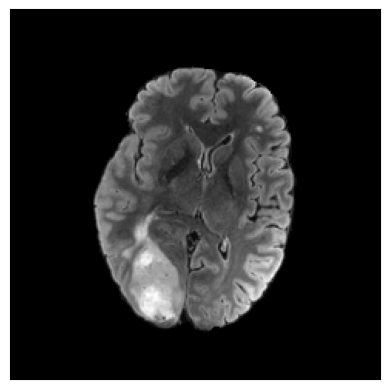

In [3]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load an image in SimpleITK format
sitk_image = sitk.ReadImage('/kaggle/working/BraTS2021_00495_flair.nii.gz')

# (1)Convert the SimpleITK image to a numpy array
np_array = sitk.GetArrayFromImage(sitk_image)

# (2)Convert the numpy array to a SimpleITK image
sitk_image = sitk.GetImageFromArray(np_array)

# Print Sitk object
# Get some attributes of the object
# Print the shape of the Numpy array

slice_index = np_array.shape[0] // 2  # Select the middle slice
image_slice = np_array[slice_index, :, :]  # Extract the 2D slice
plt.imshow(image_slice, cmap='gray') # Use 'gray' colormap for medical images
plt.xticks([])
plt.yticks([])
plt.show()

### NiBabel
<img src= "https://nipy.org/nibabel/_static/nibabel-logo.svg">

NiBabel is a **Python library** used to handle **neuroimaging file formats** like NIfTI, MINC, and Analyze. It provides tools for reading and writing image headers and volumes.
- Efficiently loads and manipulates neuroimaging data.
- Supports multi-dimensional images (3D, 4D).
- Converting between different neuroimaging file formats.
  
Read more about Nibabel [HERE](https://nipy.org/nibabel/), 
Also read about dicom2nifti [HERE](https://dicom2nifti.readthedocs.io/en/latest/)

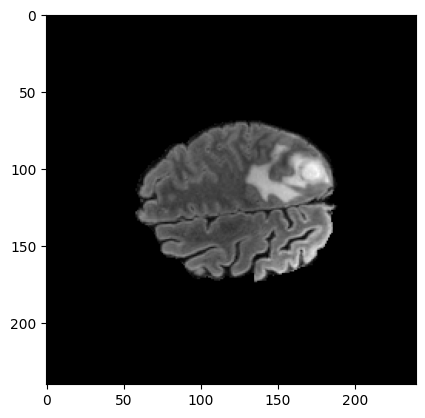

In [4]:
import nibabel as nib

# Load the medical image file
img = nib.load('/kaggle/working/BraTS2021_00495_flair.nii.gz')

# Print the nib object
# print the header 
# access header attributes 


# Extract the image data as a numpy array
data = img.get_fdata()

# Create a new NIfTI image object with the filtered data and the same affine transformation matri
# nib.Nifti1Image(data, affine, header=None, extra=None, file_map=None)

nif_img = nib.Nifti1Image(data, img.affine)

# Save the image to a new file
nib.save(nif_img, 'newNifti_image.nii.gz')


slice_index = data.shape[0] // 2  # Select the middle slice
image_slice = data[:,:,slice_index]  # Extract the 2D slice
plt.imshow(image_slice, cmap='gray') # Use 'gray' colormap for medical images

### pydicom

pydicom is a pure Python library used to read, write, and manipulate DICOM files. It allows users to extract metadata and convert DICOM images into NumPy arrays.
- For extracting pixel data and metadata from DICOM images.
  
Read more about Pydicom [HERE](https://pydicom.github.io/pydicom/stable/)

In [5]:
import pydicom
import numpy as np
from PIL import Image


# Read the DICOM image
ds = pydicom.dcmread('/kaggle/input/dicom-image/ad6c20d4-7813-4d7e-abe9-bfc2c53b2038')

# Print as object

# Extract patient name and birthday (metadata)
patient_name = ds.PatientName

# Print the patient name 
print("Patient Name: ", patient_name)

# Get the pixel data and shape of the image
pixel_data = ds.pixel_array
print("Image Shape: ",pixel_data.shape)

plt.imshow(pixel_data, cmap="gray")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dicom-image/ad6c20d4-7813-4d7e-abe9-bfc2c53b2038'

### MONAI
<img src="https://monai.io/assets/img/MONAI-logo_color_full.png" height="200" width="200">

MONAI is a specialized **deep learning framework** for medical imaging, built on top of PyTorch. It provides pre-built models and tools tailored for medical AI applications.
- Supports advanced augmentation and pre-processing for medical images.
- Provides state-of-the-art deep learning architectures for segmentation and classification.
- Optimized for multi-dimensional medical data (2D, 3D, 4D).

Learn more [HERE](https://monai.io/)

In [ ]:
!pip -q install monai

In [ ]:
from monai.data import ImageReader
from monai.transforms import LoadImage

# Load the image
image_path = "/kaggle/working/BraTS2021_00495_flair.nii.gz" 
loader = LoadImage(image_only=False)

image, meta_data = loader(image_path)

print(f"Image shape: {image.shape}")  # Typically (H, W, D) for 3D images
print("Affine : ", meta_data["affine"])


### TorchIO
<img src="https://torchio.readthedocs.io/_static/torchio_logo_2048x2048.png" width="100" height="100">

TorchIO is a **PyTorch-based** library designed for medical imaging, with a focus on **deep learning**. It supports 3D images, making it suitable for MRI, CT, and PET scans.
- Provides extensive augmentations for medical images.
- Supports loading and preprocessing 3D image datasets.
- Works seamlessly with MONAI and PyTorch.

Read more about TorchIO [HERE](https://torchio.readthedocs.io/#)

In [ ]:
 !pip -q install torchio

In [ ]:
import torchio as tio

# Load the image
image = tio.ScalarImage("/kaggle/working/BraTS2021_00495_flair.nii.gz")  
print(f"Image shape: {image.shape}")  # Shape is (C, H, W, D)


# Visualization of Medical Images

### matplotlib & seaborn
Matplotlib and Seaborn are general-purpose visualization libraries that can be used to display medical images in 2D.
- Used Plotting slices of MRI or CT scans.
- Visualizing segmentation maps of medical images.

# Medical Image Pre-processing With MONAI and TorchIO

Why is data preprocessing I/O so important ??
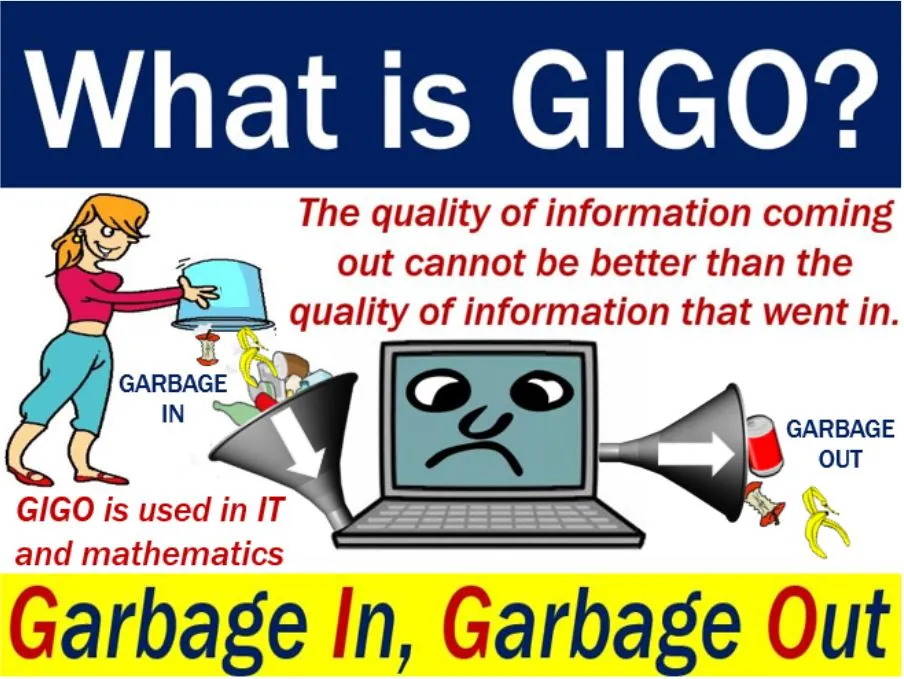

## The three parts of NIfTI images

NIfTI images can be roughly divided into three "parts":

1. The header with metadata
2. The image data
3. The affine matrix

### The header
The header of nifti files contains metadata about the scan, such as the units of measurement, the voxel size, etc. In `Nifti1Images`, the header is an attribute:

In [ ]:
# store header attribute in a new variable, for ease of use
img_t1 = nib.load('/kaggle/working/BraTS2021_00495_t1.nii.gz')
hdr = img_t1.header
print(type(hdr))

In [ ]:
# Metadata Stored in the Header file
print(img_t1.header)

The header is a custom `Nifti1Header` object with its own methods and attributes. For example, we can call the method `get_zooms()` to see the voxel size (and optionally the sampling rate with `get_xyzt_units()`, if it's a fMRI file).

### The data
Creating a `Nifti1Image` object doesn't load the _actual_ data (ie. voxel intensities) in the memory. This is postponed because it's a memory-intensive operation: loading in a scan with 240 x 240 x 155 is almost 9 million numbers! By postponing the loading the data, we can take a peek of the image dimensions without loading all the data in the memory.

To load in the data, we use `get_fdata()` method, which will return a numpy array with the same dimensions as the image data. Let's take a look:

In [ ]:
t1_img_data = img_t1.get_fdata()

print(type(t1_img_data)) # it's a numpy memory-map
print(f"T1 Shape: {t1_img_data.shape}")

### The affine
The affine matrix relates the position of the image coordinates to real world coordinates. In other words, we have some voxel space coordinate $(i, j, k)$ and we want to generate the reference ("real world") space coordinate $(x, y, z)$:
- The affine matrix defines how the image is aligned in physical space (real-world coordinates.
- It maps voxel indices to a coordinate system used in neuroimaging.
- This is crucial for registration (aligning images from different scans or patients).

$$
\left(\begin{array}{cc}
x, & y, & z
\end{array}\right)= f
\left(\begin{array}{cc}
i,&j,&k
\end{array}\right)
$$

$f$ is our coordinate transform function that accepts a voxel coordinate and returns a coordinate in the reference space. Since we know that the scanner collects data on a regular grid, the relationship between $(i, j, k)$ and $(x, y, z)$ is [linear](https://en.wikipedia.org/wiki/Linear_map) and can be encoded with the linear [affine transformations](https://en.wikipedia.org/wiki/Affine_transformation) comprising translations, rotations, and scaling.

<img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimage.slideserve.com%2F578986%2Faffine-transforms-aka-linear-geometric-l.jpg&f=1&nofb=1' width='500pxl'>

Image source: [https://www.slideserve.com/ostinmannual/spatial-processing](https://www.slideserve.com/ostinmannual/spatial-processing)

<!-- Let’s sketch a scenario in which the image’s affine becomes important.
Suppose you were given a NIfTI file by a colleague (we’ll pretend that the `img` variable represents this mysterious NIfTI file). You have no idea whether it’s even a brain scan, so you decide to plot three slices - one from each of the three axes.

First, let's get the coordinates for the middle voxel in the data array: -->

In [ ]:
A = img_t1.affine
print(A)

In [ ]:
n_i, n_j, n_k = t1_img_data.shape
i = (n_i - 1) // 2 
j = (n_j - 1) // 2
k = (n_k - 1) // 2
print(t1_img_data.shape)
print(i, j, k)

<!-- The values $(119, 119, 77)$ are indices center into the data array `img_data`. We call this a "voxel coordinate" (ie. a coordinate into the voxel array).

Now, let's view slices over the first, second and third dimensions of the array using the center coordinates: -->

### Define Function to Visualize Slices of the Data

In [ ]:
# specify the indices for each slice (here using the center, as calculated in the previous cell)
def make_slices(img_data):
    n_i, n_j, n_k = t1_img_data.shape
    i = (n_i - 1) // 2  # // for integer division
    j = (n_j - 1) // 2
    k = (n_k - 1) // 2
    slice_0 = img_data[i, :, :]
    slice_1 = img_data[:, j, :]
    slice_2 = img_data[:, :, k]
    return [slice_0, slice_1, slice_2]


#Function to display row of image slices
def show_slices(slices):
    
    fig, axes = plt.subplots(1, len(slices), figsize=(15,15))
    for idx, slice in enumerate(slices):
        axes[idx].imshow(slice.T, cmap="gray", origin="lower")
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])

    axes[0].set_xlabel('Second dim voxel coords.', fontsize=12)
    axes[0].set_ylabel('Third dim voxel coords', fontsize=12)
    axes[0].set_title('First dimension (i), slice {}'.format(i), fontsize=15)

    axes[1].set_xlabel('First dim voxel coords.', fontsize=12)
    axes[1].set_ylabel('Third dim voxel coords', fontsize=12)
    axes[1].set_title('Second dimension (j), slice {}'.format(j), fontsize=15)

    axes[2].set_xlabel('First dim voxel coords.', fontsize=12)
    axes[2].set_ylabel('Second dim voxel coords', fontsize=12)
    axes[2].set_title('Third dimension (k), slice {}'.format(k), fontsize=15)

# display slices calling our function
show_slices(make_slices(t1_img_data))

<img src="https://openbooks.lib.msu.edu/app/uploads/sites/6/2021/03/AnatomicalPlanes.png">

## Pre-processing with MONAI

Check [this](https://docs.monai.io/en/stable/transforms.html) attached document for more of monai transforms

### Normalization
Normalization is commonly used to improve the contrast in an image without distorting relative graylevel intensities too significantly.

The [normalization process](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4215426/) should produce units that:

1. have a common interpretation across locations within the same tissue type
2. are replicable
3. preserve the rank of intensities
4. have similar distributions for the same tissues of interest within and across patients
5. are not influenced by biological abnormality or population heterogeneity
6. are minimally sensitive to noise and artifacts and
7. do not result in loss of information associated with pathology or other phenomena.

In [ ]:
import warnings
warnings.filterwarnings("ignore")  #This will completely hide all warnings, which might not always be ideal.

In [ ]:
from monai.transforms import ScaleIntensity, NormalizeIntensity
import seaborn as sns
import torch

#Convert the 3D image data to 4D [chanel, x, y, z]
t1_img_data = torch.tensor(t1_img_data)  # Convert to torch.Tensor
image_plus_dim = t1_img_data.unsqueeze(0) #Add a channel dimension → Shape becomes (1, 240, 240, 155)

# Normalize intensity to range [0, 1]
scaler = ScaleIntensity(minv=0, maxv=1)
normalized_img = scaler(image_plus_dim)
normalized_img = normalized_img.squeeze(0)  # Squeeze to remove channel dimension


fig, axes = plt.subplots(2, 1)
sns.distplot(image_plus_dim, ax=axes[0], kde=False)
sns.distplot(normalized_img, ax=axes[1], kde=False)
axes[0].set_title('Original histogram')
axes[1].set_title('Scaled Intensity')
axes[0].set_ylim((0, 1e6))
axes[1].set_ylim((0, 1e6))
plt.tight_layout()

In [ ]:
# Display the normalized Image 
show_slices(make_slices(normalized_img))

In [ ]:
# Normalize using Z-score (mean=0, std=1)
normalizer = NormalizeIntensity()
normalized_img_zscore = normalizer(image_plus_dim)

fig, axes = plt.subplots(2, 1)
sns.distplot(image_plus_dim, ax=axes[0], kde=False)
sns.distplot(normalized_img_zscore, ax=axes[1], kde=False)
axes[0].set_title('Original histogram')
axes[1].set_title('Z-normalization')
axes[0].set_ylim((0, 1e6))
axes[1].set_ylim((0, 1e6))
plt.tight_layout()

### Rescaling 
- Resample input image into the **specified pixdim**
- Different MRI or CT scanners have different voxel resolutions (e.g., 1mm³ vs. 2mm³ voxels). Rescaling voxel spacing ensures that images are **isotropic**, meaning equal resolution in all dimensions.

- High-resolution medical images require too much memory and slow down training. Rescaling to a lower resolution speeds up training while retaining essential features.


In [ ]:
from monai.transforms import Spacing

# Rescale image to a new voxel spacing
rescale_transform = Spacing(pixdim=(0.85, 0.85, 0.85), mode="linear") # in mm
rescaled_img = rescale_transform(image_plus_dim)
rescaled_img = rescaled_img.squeeze(0)

print("Image Before and After Rescaling")
show_slices(make_slices(t1_img_data))

show_slices(make_slices(rescaled_img))


### Reshaping 
- Reshaping is crucial in medical image processing because medical images come in different shapes and dimensionalities (2D vs. 3D). Reshaping ensures compatibility with deep learning models, standardizes input formats, and enables efficient processing.


In [ ]:
from monai.transforms import Resize
import torch

# Resize to (128, 128, 128)
resize_transform = Resize(spatial_size=(200,200,128), mode='linear',align_corners= True)
resized_img = resize_transform(image_plus_dim)

print("Image Before Reshaping")
print(f"Shape: {t1_img_data.shape}")
show_slices(make_slices(t1_img_data))

In [ ]:
print("Image After Reshaping")

resized_img = resized_img.squeeze(0) #Removing the Channel dimension (C H W D -> W W D)
print(f"Shape: {resized_img.shape}") #
show_slices(make_slices(resized_img))

## Pre-processing with TorchIo

### Normalization

In [ ]:
import torchio as tio

# Load a NIfTI image
flair =tio.ScalarImage("/kaggle/working/BraTS2021_00495_flair.nii.gz")
flair

Read more [HERE](https://torchio.readthedocs.io/transforms/preprocessing.html#znormalization)

In [ ]:
# Apply Z-score normalization
transform = tio.ZNormalization()
normalized_img = transform(flair)
print(normalized_img)
show_slices(make_slices(normalized_img.data.squeeze(0)))

### Rescaling 

In [ ]:
# Resample to isotropic 0.75mm voxel size
transform = tio.Resample(target=0.75)
rescaled_img = transform(normalized_img) ## Rescaling the normalized image to pixdim[0.75,0.75,0.75]
print(rescaled_img)

show_slices(make_slices(rescaled_img.data.squeeze(0))) # Display the mid slice of the image

Read more [HERE](https://torchio.readthedocs.io/transforms/preprocessing.html#resample)

### Reshaping

In [ ]:
resize_transform = tio.Resize(target_shape=(200, 200, 128), image_interpolation='nearest')
resized_img = resize_transform(rescaled_img) # Reshaping the rescaled image 
print(resized_img)

show_slices(make_slices(resized_img.data.squeeze(0))) # Display the mid slice of the image

Read more from the [documentary](https://torchio.readthedocs.io/transforms/preprocessing.html#resize)

ALso check this [Medium](https://medium.com/@toufiqmusah32/introduction-to-torchio-for-3d-mri-processing-preprocessing-transforms-part-1-87947c339400) article "Introduction to TorchIO for 3D MRI Processing: Preprocessing Transforms (Part 1)" By Toufiq Musah a SPARK team coordinator 

# Data Augmentation¶

**Importance:**

- Augmentations mimic real-world variability (patient movement, scanner differences).
- Helps models generalize better across different datasets.

- Prevents overfitting, ensuring the model doesn't memorize training data.
- Enhances model robustness to spatial transformations.

## Geometric

### Crop and Pad

- Cropping: Helps focus on regions of interest (e.g., tumors) and reduces computation by removing irrelevant background.
- Padding: Ensures that images have a consistent size when they are too small, which is necessary for batch processing in deep learning.

In [ ]:
from monai.transforms import CenterSpatialCrop
from monai.transforms import SpatialPad

# Crop the center to a region of interest with size (200, 200, 130)
crop_transform = CenterSpatialCrop(roi_size=(200, 200, 130))
cropped_image = crop_transform(image_plus_dim)

print(f"Image Before and After Cropping and Padding") 
show_slices(make_slices(image_plus_dim.squeeze(0)))

show_slices(make_slices(cropped_image.squeeze(0)))

# Pad the cropped image so that its spatial dimension equals that of the original image 

pad_transform = SpatialPad(spatial_size=(t1_img_data.shape))
padded_image = pad_transform(cropped_image)

show_slices(make_slices(padded_image.squeeze(0)))

In [ ]:
## With TorchIO

# Define a transform to crop or pad the image to the target size (200, 200, 130)
crop_or_pad_transform = tio.CropOrPad((200, 200, 130))

# Apply the transform
tio_padded_img = crop_or_pad_transform(image_plus_dim)

#visualize the slices
show_slices(make_slices(tio_padded_img.squeeze(0)))

### Rotation

- Rotates the image around a given axis.
- Helps the model learn rotation-invariant features, especially in 3D medical images (CT, MRI).

In [ ]:
from monai.transforms import RandRotate

rotate_transform = RandRotate(range_x=15, prob=1.0)  # Rotate ±15 degrees
rotated_image = rotate_transform(image_plus_dim)


print(f"Image Before and After Rotation") 
show_slices(make_slices(image_plus_dim.squeeze(0)))

show_slices(make_slices(rotated_image.squeeze(0)))

In [ ]:
## Using TorchIO
rotate_transform = tio.RandomAffine(degrees=(20, 20, 20))  # Rotate randomly within ±20 degrees
tio_rotated_image = rotate_transform(image_plus_dim)

show_slices(make_slices(tio_rotated_image.squeeze(0)))

### Flipping

- Mirrors the image along a chosen axis.

In [ ]:
from monai.transforms import Flip

flip_transform = Flip(spatial_axis=0)  # Flip along the first spatial axis
flipped_image = flip_transform(image_plus_dim)

print(f"Slices Before and After Flipping")
show_slices(make_slices(image_plus_dim.squeeze(0)))

show_slices(make_slices(flipped_image.squeeze(0)))

In [ ]:
## Using TorchIO
flip_transform = tio.RandomFlip(axes=(1,))  # Flip along the second axis
tio_flipped_image = flip_transform(image_plus_dim)

print(f"Slices After Flipping")
show_slices(make_slices(tio_flipped_image.squeeze(0)))

### Scaling

- Enlarges or shrinks the image.
- Helps simulate variations in patient anatomy and imaging conditions.


In [ ]:
from monai.transforms import RandAffine

scale_transform = RandAffine(scale_range=(0.5, 1.5), prob=0.6)  # Scale ±10%
scaled_image = scale_transform(image_plus_dim)

print(f"Slices Before and After Scaling")
show_slices(make_slices(image_plus_dim.squeeze(0)))

show_slices(make_slices(scaled_image.squeeze(0)))


In [ ]:
## Using TorchIO
scale_transform = tio.RandomAffine(scales=(0.5, 1.5))  # Scale ±10%
tio_scaled_image = scale_transform(image_plus_dim)

show_slices(make_slices(tio_scaled_image.squeeze(0)))

### Translation
- Moves the image in a certain direction.
- Simulates patient movement during scanning.

In [ ]:
translate_transform = RandAffine(translate_range=(10, 10, 10), prob=1.0)  # Translate by ±10 voxels
translated_image = translate_transform(image_plus_dim)

print(f"Slices Before and After Translation")
show_slices(make_slices(image_plus_dim.squeeze(0)))

show_slices(make_slices(translated_image.squeeze(0)))

In [ ]:
## Using TorchIO
translate_transform = tio.RandomAffine(translation=(10, 10, 10))  # Translate by ±10 voxels
tio_translated_image = translate_transform(image_plus_dim)

show_slices(make_slices(tio_translated_image.squeeze(0)))

## Intensity

In [ ]:
# Noise
# Contrast
# Brightness
# Histogram Equalization


### Noise
- Adds random noise to the image to simulate sensor noise or imaging artifacts.
- Helps models become robust to real-world noise (MRI, CT artifacts). 

In [ ]:
from monai.transforms import RandGaussianNoise

noise_transform = RandGaussianNoise(prob=1, mean=0.0, std=0.1)  # Add Gaussian noise
noisy_image = noise_transform(image_plus_dim)

print(f"Slices before and After Random Noise")
show_slices(make_slices(image_plus_dim.squeeze(0)))

show_slices(make_slices(noisy_image.squeeze(0)))

In [ ]:
## Using TorchIO
noise_transform = tio.RandomNoise(mean=0, std=0.1)  # Gaussian noise with std=0.1
toi_noisy_image = noise_transform(image_plus_dim)  # takes in 4D image (channels, x, y, z)

show_slices(make_slices(toi_noisy_image.squeeze(0)))

### Contrast
- Modifies the intensity range of the image to increase or decrease contrast.
- Enhances visual differences between tissues, improving feature extraction.

In [ ]:
from monai.transforms import RandAdjustContrast

contrast_transform = RandAdjustContrast(prob=1.0, gamma=3)  # Adjust contrast randomly
contrast_image = contrast_transform(image_plus_dim)

print(f"Slices Before and After Random Contrast")
show_slices(make_slices(image_plus_dim.squeeze(0)))
show_slices(make_slices(contrast_image.squeeze(0)))

In [ ]:
## Using TorchIO 
contrast_transform = tio.RandomGamma(log_gamma=(-0.2, 1.3))  # Adjust contrast with gamma
toi_contrast_image = contrast_transform(image_plus_dim)
toi_contrast_image = toi_contrast_image.squeeze(0)  # Squeeze to remove extra dimension 

print(f"Slices After Random Contrast")
show_slices(make_slices(toi_contrast_image))


### Brightness
- Alters the overall brightness of the image.
- Simulates scanner intensity variations and helps models generalize.


In [ ]:
from monai.transforms import RandShiftIntensity

brightness_transform = RandShiftIntensity(offsets=(-0.5, 0.5), prob=1.0)  # Brightness shift
bright_image = brightness_transform(image_plus_dim)

print(f"Slices Before and After Change of Brightness")
show_slices(make_slices(image_plus_dim.squeeze(0)))
show_slices(make_slices(bright_image.squeeze(0)))


In [ ]:
## With TorchIO
brightness_transform = tio.RandomBiasField(coefficients=0.3)  # Brightness variation
tio_bright_image = brightness_transform(image_plus_dim)

show_slices(make_slices(tio_bright_image.squeeze(0)))


### Histogram Equalization
- Enhances contrast by redistributing intensity values.
- Helps in low-contrast medical images (e.g., X-rays).

In [ ]:
from monai.transforms import HistogramNormalize

hist_eq_transform = HistogramNormalize()  # Normalize histogram
hist_eq_image = hist_eq_transform(image_plus_dim)

print(f"Slices Before and After Histogram Equalization")
show_slices(make_slices(image_plus_dim.squeeze(0)))
show_slices(make_slices(hist_eq_image.squeeze(0)))


In [ ]:
## With TorchIO
hist_eq_transform = tio.RescaleIntensity(out_min_max=(0, 1))  # Normalize intensities

tio_hist_eq_image = hist_eq_transform(image_plus_dim)
show_slices(make_slices(tio_hist_eq_image.squeeze(0)))


### Composing Multiple Transform

In [ ]:
from monai.transforms import (
    Compose,
    RandRotate,
    RandFlip,
    RandAffine,
    RandGaussianNoise,
    RandAdjustContrast,
    RandShiftIntensity,
    HistogramNormalize,
)

# Compose a pipeline with several augmentations:
monai_transforms = Compose([
    # Geometric augmentations:
    RandRotate(range_x=15, prob=0.5),                   # Random rotation within ±15° around x-axis
    RandFlip(spatial_axis=0, prob=0.5),                   # Random flipping along the first spatial axis
    RandAffine(                                       
        translate_range=(10, 10, 10),                   # Random translation (shift) up to ±10 voxels
        scale_range=(0.9, 1.1),                         # Random scaling between 90% and 110%
        prob=0.5
    ),
    # Intensity augmentations:
    RandGaussianNoise(prob=0.5, mean=0.0, std=0.05),      # Add random Gaussian noise
    RandAdjustContrast(prob=0.5, gamma=(0.8, 1.2)),         # Adjust image contrast via gamma correction
    RandShiftIntensity(prob=0.5, offsets=(-0.1, 0.1)),      # Shift intensities to simulate brightness changes
    HistogramNormalize()                                  # Normalize the image histogram (akin to histogram equalization)
])


## Loading all MRI Modalities

In [ ]:
## Load the different Image modalities 

# Load a NIfTI image as a TorchIO Subject
t1 = nib.load("/kaggle/working/BraTS2021_00495_t1.nii.gz")
t1ce = nib.load("/kaggle/working/BraTS2021_00495_t1ce.nii.gz")
t2 = nib.load("/kaggle/working/BraTS2021_00495_t2.nii.gz")
flair = nib.load("/kaggle/working/BraTS2021_00495_flair.nii.gz")
seg = nib.load("/kaggle/working/BraTS2021_00495_seg.nii.gz")


In [ ]:
affine, header = flair.affine, flair.header
vol = np.stack([flair.get_fdata(), t1.get_fdata(), t1ce.get_fdata(), t2.get_fdata()], axis=-1)
vol = nib.nifti1.Nifti1Image(vol, affine, header=header)

vol_data = vol.get_fdata()
print("Shape: ", vol_data.shape)


In [ ]:
#Show slices of the merged data
# Choose the middle slice along the depth axis (third dimension)
slice_index = vol_data.shape[2] // 2  # e.g., 155//2 = 77

# Extract the slice for channel 0 (flair)
slice_img = vol_data[:, :, slice_index, 0]

plt.imshow(slice_img, cmap='gray', origin='lower')
plt.title("Middle Slice - Channel 0")
plt.colorbar()
plt.show()

# Data Loaders (with PyTorch)

**Data loading** is the process of reading raw data from storage (files, databases, etc.), pre-processing it (e.g., normalization, reshaping, and augmentation), and converting it into a format suitable for a machine learning model.

### Importance of Data Loading Pipelines 
- Efficiency: Proper data loading pipelines reduce bottlenecks, ensuring the GPU or model isn't idling while waiting for data.
- Correctness: It guarantees that the data is pre-processed, aligned, and formatted correctly, which is crucial for reliable model performance.
- Reproducibility: Consistent and well-managed data loading ensures that experiments can be reliably repeated and compared.

Read this Paper on [The importance of Data Loading Pipelines in Training Deep Neural Networks](https://arxiv.org/abs/2005.02130)

## Defining a Custom BraTS Dataset Class

In [ ]:
!tar -xf /kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar

In [ ]:
import os
import numpy as np
import nibabel as nib
import torch
from torch.utils.data import Dataset
from monai.transforms import LoadImage

loader = LoadImage(image_only = False)

class BraTS_Dataset(Dataset):
    def __init__(self, data_dir, patient_ids=None, transforms=None, mode='train'):
        """
        Args:
            data_dir (str): Root directory containing subfolders for each patient.
            patient_ids (list, optional): List of patient IDs. If None, the class will use all subdirectories in data_dir.
            transforms (callable, optional): A function/transform that takes in a volume (and segmentation mask)
                                             and returns the transformed version.
            mode (str): 'train' if segmentation masks are available, 'test' otherwise.
        """
        self.data_dir = data_dir
        # If no patient_ids are provided, list only directories from the data_dir
        if patient_ids is None:
            self.patient_ids = [d for d in os.listdir(data_dir)
                                if os.path.isdir(os.path.join(data_dir, d))]
        else:
            self.patient_ids = patient_ids
        self.transforms = transforms
        self.mode = mode

    def __len__(self):
        return len(self.patient_ids)
    
    def __getitem__(self, idx):
        patient_id = self.patient_ids[idx]
        # Patient folder is expected to be: data_dir/patient_id/
        patient_folder = os.path.join(self.data_dir, patient_id)
        
        
        # 1. Load modalities from the patient subfolder.
        modalities = {}
        for modality in ['t1', 't1ce', 't2', 'flair']:
            file_path = os.path.join(patient_folder, f"{patient_id}_{modality}.nii.gz")
            id_img, id_meta_data = loader(file_path)
            modalities[modality] = (id_img, id_meta_data) # create a dictionary Key with modality and values  as a tuple of the image and the meta_data
        
        seg_img = None
        if self.mode == 'train':
            seg_file = os.path.join(patient_folder, f"{patient_id}_seg.nii.gz")
            seg_img, _ = loader(seg_file)
            
            

        
        # 2.(stack) modalities.
        # Use FLAIR as a reference for affine.
        ref = modalities['flair']
        affine = ref[1]["affine"]   # Get the Affine matrix of the image

        # Extract image data from each modality.
        flair_data = modalities['flair'][0]
        t1_data    = modalities['t1'][0]
        t1ce_data  = modalities['t1ce'][0]
        t2_data    = modalities['t2'][0]

        # Stack modalities along a new axis (creating an array of shape (H, W, D, 4))
        vol = np.stack([flair_data, t1_data, t1ce_data, t2_data], axis=-1)
        # Rearrange dimensions to (C, H, W, D) for deep learning frameworks.
        vol = np.transpose(vol, (3, 0, 1, 2))
        
        # Create a new NIfTI image for the registered volume.
        vol_img = nib.Nifti1Image(vol, affine)
        
        
        
        # 3. Apply optional transforms.
        if self.transforms is not None:
            if seg_img is not None:
                vol_img, seg_img = self.transforms(vol_img.get_fdata()), self.transforms(seg_img)
            else:
                vol_img = self.transforms(vol_img)

        else:
            vol_img = vol_img.get_fdata()

        
        
        # 4. Convert images to NumPy arrays and then to torch.Tensor.
        vol_tensor = torch.from_numpy(vol_img.astype(np.uint8))
        
        seg_tensor = None
        if seg_img is not None:
            seg_tensor = torch.from_numpy(seg_img.astype(np.uint8))
        
        return {
            'image': vol_tensor,   # Shape: (4, H, W, D)
            'seg': seg_tensor,     # Shape: (H, W, D) or None
            'patient_id': patient_id
            }

In [ ]:
if __name__ == "__main__":
    data_dir = "/kaggle/working"  # Root directory containing patient subfolders.
    
    # The class will automatically detect patient subfolders from data_dir.
    dataset = BraTS_Dataset(data_dir, mode='train',transforms=monai_transforms)
    
    # For example, get the first patient's data.
    sample = dataset[1]
    print("Patient ID:", sample['patient_id'])
    print("Image shape:", sample['image'].shape)  # Expected: (4, H, W, D)
    if sample['seg'] is not None:
        print("Segmentation shape:", sample['seg'].shape)

In [ ]:
# Create the dataset using the MONAI transform pipeline.
dataset = BraTS_Dataset(data_dir="/kaggle/working", patient_ids=None, transforms=monai_transforms, mode='train')

In [ ]:
# Build a DataLoader.
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True, num_workers=2)

# Iterate over a batch to see the output.
for batch in dataloader:
    images = batch['image']   # Expected shape: (batch_size, 4, H, W, D)
    segs = batch['seg']       # Expected shape: (batch_size, H, W, D)
    patient_ids = batch['patient_id']
    print("Patient IDs:", patient_ids)
    print("Images shape:", images.shape)
    if segs is not None:
        print("Segmentation shape:", segs.shape)
    break  # Display one batch for demonstration.